### Naive Bayes Training Script
#### Author: Austin Fernandez
#### Date Modified: April 25, 2020

In [1]:
# dependencies
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import CategoricalNB, ComplementNB, MultinomialNB, GaussianNB
# from sklearn.naive_bayes import ComplementNB, MultinomialNB
import numpy as np
from scipy.stats import uniform, norm
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from XLB import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
x_train, y_train = extract_data("TrainingSet (Labeled Only).csv")
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

(246, 327)
(246, 324)
(246,)


In [3]:
rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)

x_smote, y_smote = oversampler.fit_resample(x_train,y_train)

print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)

x_os, y_os = oversampler.fit_resample(x_train,y_train)

print(x_os.shape,y_os.shape)

(456, 324) (456,)
(456, 324) (456,)


In [4]:
# GaussianNB, GridSearch
k_folds = 5

parameters = {
    'var_smoothing' : [j / np.power(10,x) for x in range(1,10) for j in range(1,10)]
}
cnb = GaussianNB()
grid_search_gaussian = GridSearchCV(cnb, parameters,cv=k_folds,n_jobs=-1)

Vanilla:
Best Score: 0.2436
var_smoothing => 0.9
Splits: 5
Accuracy: 33.7398%


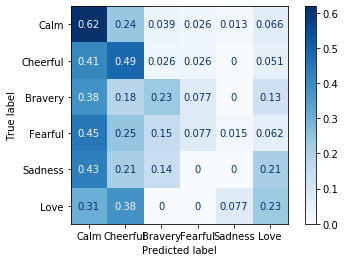

In [5]:
print_res("Vanilla",x_train,y_train,grid_search_gaussian)

Random Oversampling:
Best Score: 0.3026
var_smoothing => 0.0001
Splits: 5
Accuracy: 38.5965%


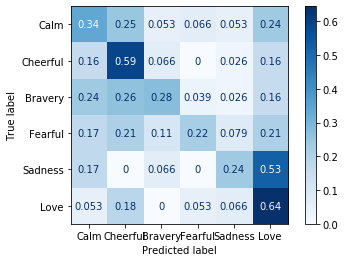

In [6]:
print_res("Random Oversampling",x_os,y_os,grid_search_gaussian)

SMOTE:
Best Score: 0.3618
var_smoothing => 1e-05
Splits: 5
Accuracy: 47.8070%


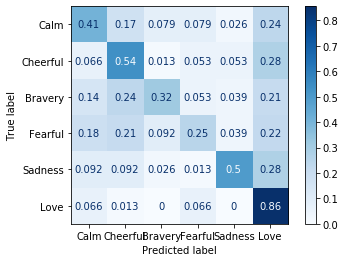

In [7]:
print_res("SMOTE",x_smote,y_smote,grid_search_gaussian)

In [8]:
# MultinomialNB, Grid Search
k_folds = 5
parameters = {
    'alpha':[0.01 * i for i in range(1,101)], 
    'fit_prior':[True, False]
}
mnb = MultinomialNB()
grid_search_multinomial = GridSearchCV(mnb, parameters,cv=k_folds,n_jobs=-1)

Vanilla:
Best Score: 0.3496
alpha => 0.01
fit_prior => True
Splits: 5
Accuracy: 35.3659%


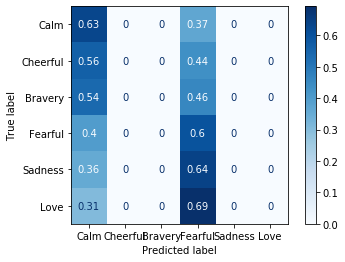

In [9]:
print_res("Vanilla",x_train[:,0:4],y_train,grid_search_multinomial)

Random Oversampling:
Best Score: 0.2630
alpha => 0.01
fit_prior => True
Splits: 5
Accuracy: 27.8509%


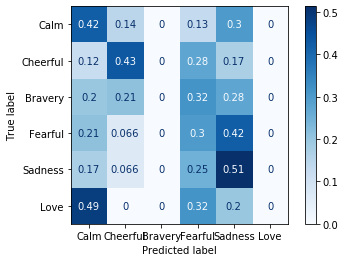

In [10]:
print_res("Random Oversampling",x_os[:,0:4],y_os,grid_search_multinomial)

SMOTE:
Best Score: 0.2543
alpha => 0.01
fit_prior => False
Splits: 5
Accuracy: 33.3333%


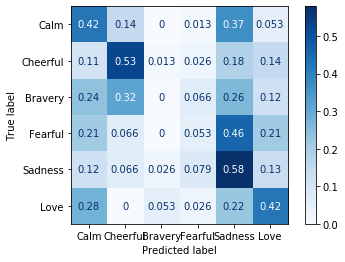

In [11]:
print_res("SMOTE",x_smote[:,0:4],y_smote,grid_search_multinomial)

In [12]:
# CategoricalNB, Grid Search
k_folds = 5
parameters = {
    'alpha':[0.01 * i for i in range(1,101)], 
    'fit_prior':[True, False]
}
canb = CategoricalNB()
grid_search_categorical = GridSearchCV(canb, parameters,cv=k_folds)

Vanilla:
Best Score: 0.3535
alpha => 0.98
fit_prior => True
Splits: 5
Accuracy: 39.8374%


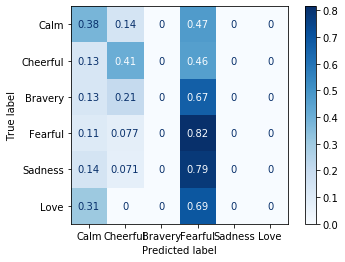

In [13]:
print_res("Vanilla",x_train[:,:5],y_train,grid_search_categorical)

Random Oversampling:
Best Score: 0.2806
alpha => 0.8
fit_prior => True
Splits: 5
Accuracy: 30.0439%


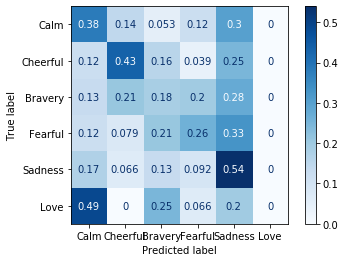

In [14]:
print_res("Random Oversampling",x_os[:,:5],y_os,grid_search_categorical)

SMOTE:
Best Score: 0.3707
alpha => 0.01
fit_prior => True
Splits: 5
Accuracy: 38.5965%


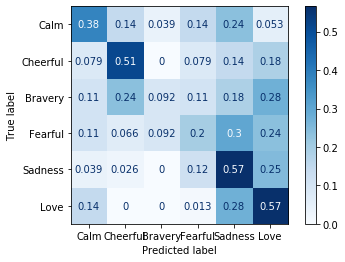

In [15]:
print_res("SMOTE",x_smote[:,:5],y_smote,grid_search_categorical)

In [16]:
# ComplementNB, Grid Search
k_folds = 5
parameters = {
    'alpha':[0.01 * i for i in range(1,101)], 
    'fit_prior':[True, False], 
    'norm' : [True, False]}
cnb = ComplementNB()
grid_search_complement = GridSearchCV(cnb, parameters,cv=k_folds,n_jobs=-1)

Vanilla:
Best Score: 0.3211
alpha => 0.01
fit_prior => True
norm => True
Splits: 5
Accuracy: 33.3333%


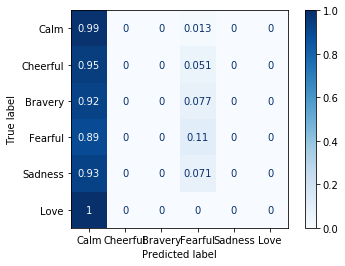

In [17]:
print_res("Vanilla",x_train,y_train,grid_search_complement)

Random Oversampling:
Best Score: 0.2807
alpha => 0.19
fit_prior => True
norm => True
Splits: 5
Accuracy: 32.0175%


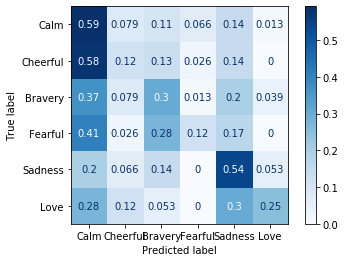

In [18]:
print_res("Random Oversampling",x_os,y_os,grid_search_complement)

SMOTE:
Best Score: 0.2938
alpha => 0.01
fit_prior => True
norm => False
Splits: 5
Accuracy: 41.8860%


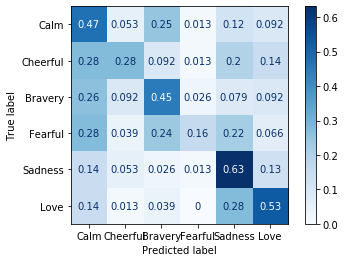

In [19]:
print_res("SMOTE",x_smote,y_smote,grid_search_complement)

In [20]:
# ComplementNB, RandomizedSearch
random_search_iterations = 1000
k_folds = 5
rand_seed = 3249807

parameters = {
    'alpha':uniform(loc=0,scale=1.0), 
    'fit_prior':[True, False], 
    'norm' : [True, False]
}
cnb = ComplementNB()
random_search_complement = RandomizedSearchCV(cnb, parameters,cv=k_folds,\
                                              n_iter=random_search_iterations,\
                                              random_state=rand_seed,n_jobs=-1)

Vanilla:
Best Score: 0.3211
alpha => 0.2274339734782188
fit_prior => True
norm => True
Splits: 5
Accuracy: 32.9268%


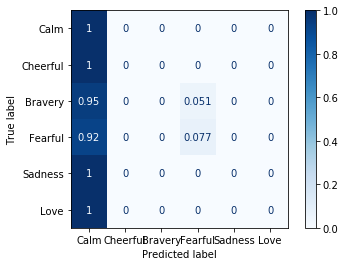

In [21]:
print_res("Vanilla",x_train,y_train,random_search_complement)

Random Oversampling:
Best Score: 0.2807
alpha => 0.2274339734782188
fit_prior => True
norm => True
Splits: 5
Accuracy: 32.0175%


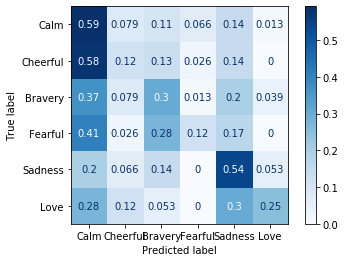

In [22]:
print_res("Random Oversampling",x_os,y_os,random_search_complement)

SMOTE:
Best Score: 0.2982
alpha => 0.0009368061799499561
fit_prior => True
norm => True
Splits: 5
Accuracy: 38.5965%


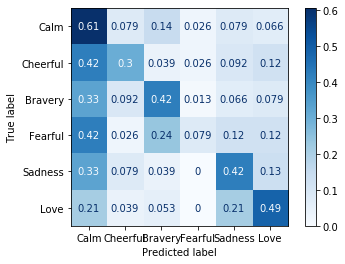

In [23]:
print_res("SMOTE",x_smote,y_smote,random_search_complement)

In [24]:
# CategoricalNB, RandomizedSearch
random_search_iterations = 1000
k_folds = 5

parameters = {
    'alpha':uniform(loc=0,scale=1.0), 
    'fit_prior':[True, False]
}
canb = CategoricalNB()
random_search_categorical = RandomizedSearchCV(canb, parameters,cv=k_folds,\
                                           n_iter=random_search_iterations,\
                                            random_state=rand_seed)

Vanilla:
Best Score: 0.3535
alpha => 0.9801488008772941
fit_prior => True
Splits: 5
Accuracy: 39.8374%


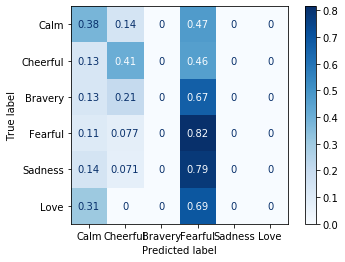

In [25]:
print_res("Vanilla",x_train[:,:5],y_train,random_search_categorical)

Random Oversampling:
Best Score: 0.2806
alpha => 0.8781474012829417
fit_prior => True
Splits: 5
Accuracy: 30.0439%


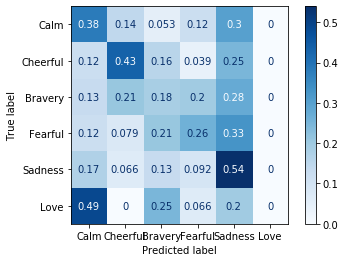

In [26]:
print_res("Random Oversampling",x_os[:,:5],y_os,random_search_categorical)

SMOTE:
Best Score: 0.3707
alpha => 0.2557277072168217
fit_prior => False
Splits: 5
Accuracy: 38.5965%


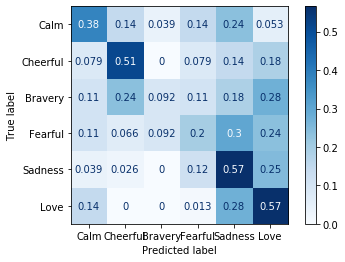

In [27]:
print_res("SMOTE",x_smote[:,:5],y_smote,random_search_categorical)

In [28]:
# MultinomialNB, RandomizedSearch
random_search_iterations = 1000
k_folds = 5

parameters = {
    'alpha':uniform(loc=0,scale=1.0), 
    'fit_prior':[True, False]
}
mnb = MultinomialNB()
random_search_multinomial = RandomizedSearchCV(mnb, parameters,cv=k_folds,\
                                            n_iter=random_search_iterations,\
                                            random_state=rand_seed,n_jobs=-1)

Vanilla:
Best Score: 0.3456
alpha => 0.8601802271579316
fit_prior => False
Splits: 5
Accuracy: 39.8374%


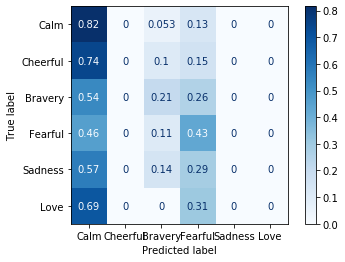

In [29]:
print_res("Vanilla",x_train,y_train,random_search_multinomial)

Random Oversampling:
Best Score: 0.2673
alpha => 0.6887496278297602
fit_prior => True
Splits: 5
Accuracy: 31.3596%


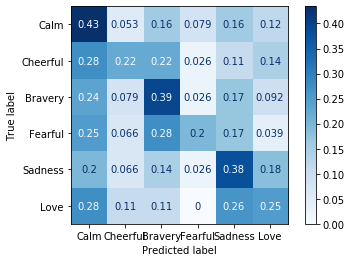

In [30]:
print_res("Random Oversampling",x_os,y_os,random_search_multinomial)

SMOTE:
Best Score: 0.3159
alpha => 0.3557017087583835
fit_prior => True
Splits: 5
Accuracy: 41.4474%


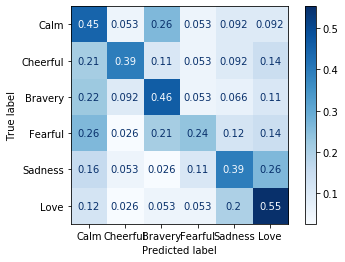

In [31]:
print_res("SMOTE",x_smote,y_smote,random_search_multinomial)